### Importing python libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

### Loading dataset

In [3]:
df= pd.read_csv(r"C:\Users\USER\OneDrive - Teesside University\ML ICA\heart.csv")

### Dataset pre-processing

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.shape

(1025, 14)

#### Dropping duplicate 

In [7]:
Heart_disease_df=df.drop_duplicates()

In [8]:
Heart_disease_df.shape

(302, 14)

In [9]:
Heart_disease_df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3    

In [10]:
Heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
Heart_disease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
Heart_disease_df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

##### 1 -----> Patient with heart diseases
##### 0 -----> Patient without heart diseases

### Data Visualization

#### Correlation 

In [13]:
Heart_disease_df_corr=Heart_disease_df.corr()

In [14]:
Heart_disease_df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

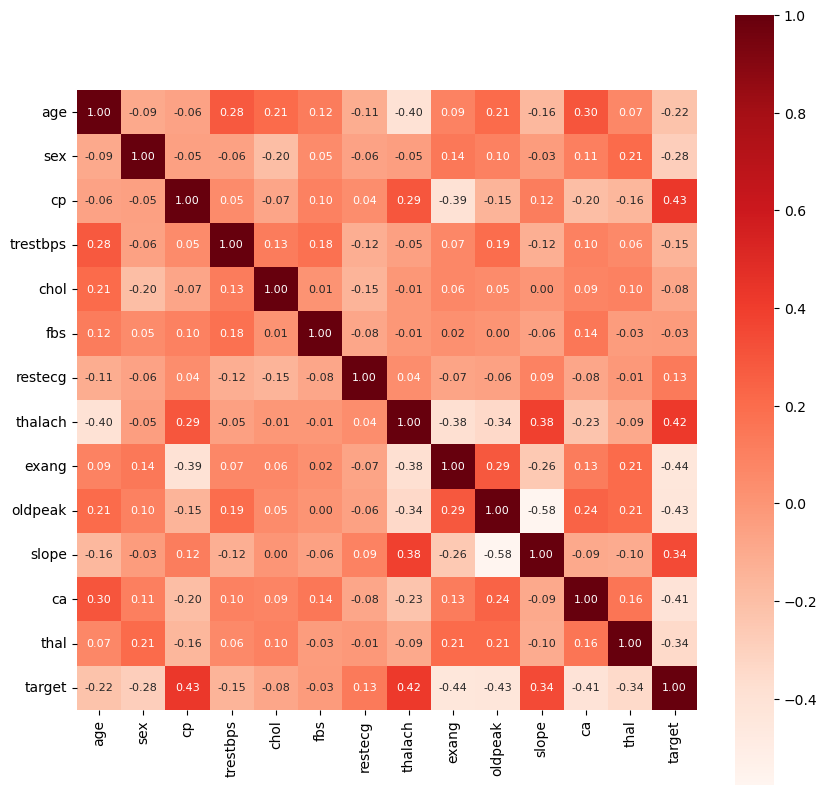

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(Heart_disease_df_corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Reds')

### Average age of the patient 

In [16]:
average_age=Heart_disease_df['age'].mean()

In [17]:
average_age

54.420529801324506

In [18]:
average_age_by_gender=Heart_disease_df.groupby('sex')['age'].mean()

In [19]:
average_age_by_gender

sex
0    55.677083
1    53.834951
Name: age, dtype: float64

#### 0---> Female
#### 1----> Male

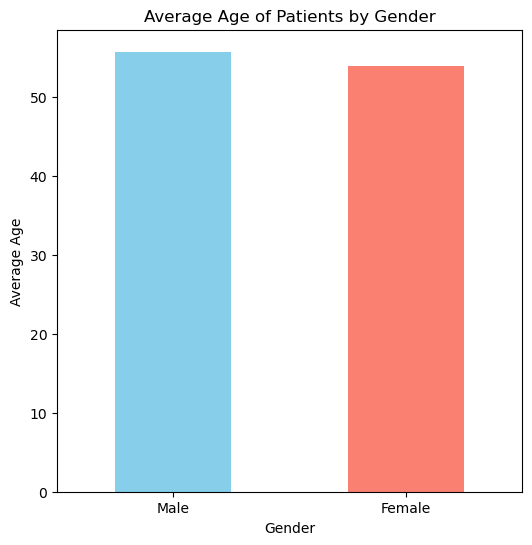

In [20]:
plt.figure(figsize=(6,6))
average_age_by_gender.plot(kind='bar',color=['skyblue','salmon'])
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average Age of Patients by Gender')
plt.xticks(ticks=[0,1],labels=['Male','Female'],rotation=0)
plt.show()

### Average blood pressure by target

In [21]:
average_bp_by_target=Heart_disease_df.groupby('target')['trestbps'].mean()
average_bp_by_target

target
0    134.398551
1    129.250000
Name: trestbps, dtype: float64

In [22]:
## 0-->Patient without heart diseases
## 1--> patient with 

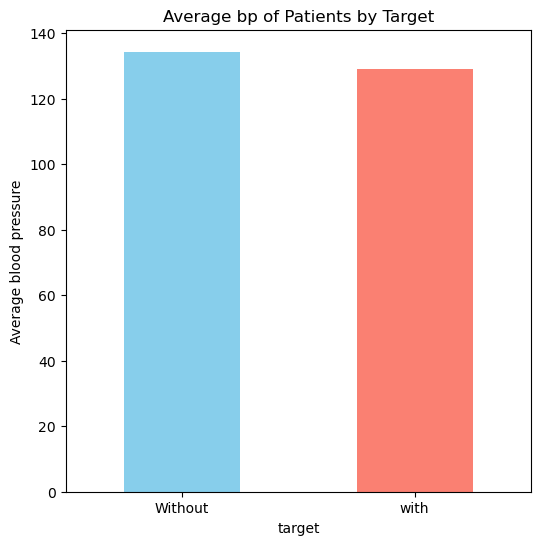

In [23]:
plt.figure(figsize=(6,6))
average_bp_by_target.plot(kind='bar',color=['skyblue','salmon'])
plt.xlabel('target')
plt.ylabel('Average blood pressure')
plt.title('Average bp of Patients by Target')
plt.xticks(ticks=[0,1],labels=['Without','with'],rotation=0)
plt.show()

### Percentage of Patients with/without heart disease

In [24]:
percentage_heart_disease= Heart_disease_df['target'].mean()*100

In [25]:
percentage_heart_disease

54.3046357615894

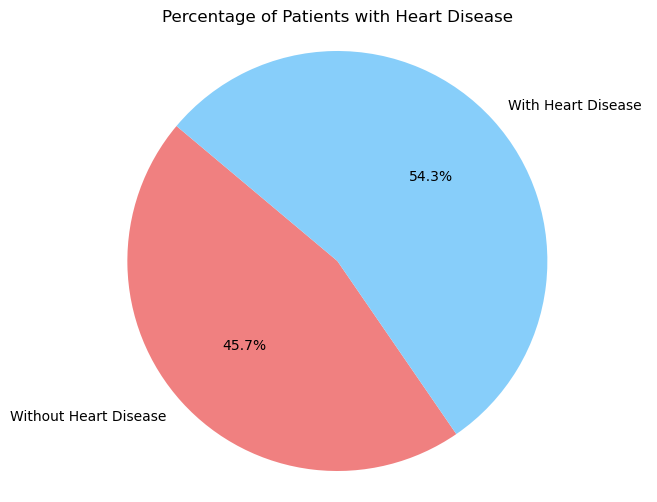

In [26]:
labels=['Without Heart Disease','With Heart Disease']
sizes=[100- percentage_heart_disease,percentage_heart_disease]
colors=['lightcoral','lightskyblue']
plt.figure(figsize=(8,6))
plt.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Percentage of Patients with Heart Disease')
plt.show()

### Percentage of Patients with Reversible Defects 

In [27]:
percentage_Reversible_Defects= Heart_disease_df['thal'].mean()*100
percentage_Reversible_Defects

231.4569536423841

In [28]:
thal_total=Heart_disease_df['thal'].value_counts()
thal_total

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

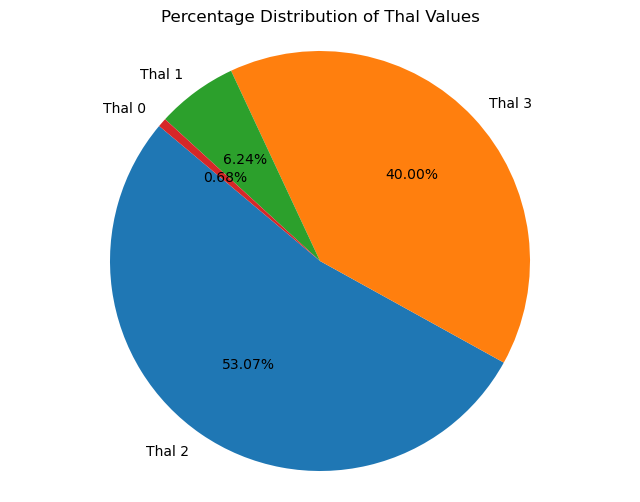

In [29]:
# Data
thal_values = {'Thal 2': 544, 'Thal 3': 410, 'Thal 1': 64, 'Thal 0': 7}
# Calculate total count of thal values
total_count = sum(thal_values.values())
# Calculate percentages
percentages = {key: (value / total_count) * 100 for key, value in thal_values.items()}
# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages.values(), labels=percentages.keys(), autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Thal Values')
plt.show()

### Spliting data into training and testing

In [30]:
Heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
X=Heart_disease_df.drop(columns='target', axis=1)

In [32]:
Y= Heart_disease_df['target']

In [33]:
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


In [34]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [35]:
X.shape

(302, 13)

In [36]:
Y.shape

(302,)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=2)

In [38]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((241, 13), (61, 13), (241,), (61,))

##### Standardize Data

In [39]:
X_train_array=np.asarray(X_train).std()
X_train_array

78.05158347300697

In [40]:
scaler=StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler()

In [42]:
X_train_Standardize=scaler.transform(X_train)

In [43]:
X_train_Standardize

array([[ 0.31376524,  0.67216607, -0.94847216, ..., -0.62675024,
        -0.69655732, -2.18635633],
       [-0.02082513,  0.67216607, -0.94847216, ..., -0.62675024,
         0.31470963,  1.09658371],
       [-1.24765647,  0.67216607, -0.94847216, ..., -0.62675024,
        -0.69655732, -0.54488631],
       ...,
       [-0.24388537,  0.67216607, -0.94847216, ...,  0.98013069,
         0.31470963,  1.09658371],
       [ 1.42906646,  0.67216607,  0.98866165, ..., -0.62675024,
        -0.69655732,  1.09658371],
       [-1.47071671, -1.48772757,  0.02009475, ...,  0.98013069,
         0.31470963, -0.54488631]])

In [44]:
X_train_Standardize.shape

(241, 13)

In [45]:
X_train_Standardize.std()

1.0

In [46]:
scaler.fit(X_test)

StandardScaler()

In [47]:
X_test_Standardize=scaler.transform(X_test)
X_test_Standardize

array([[-0.03728025,  0.72456884, -0.88434038, -0.13606256,  1.53880532,
        -0.5204165 ,  0.95197164, -0.74047635,  1.38013112,  0.28352821,
        -0.72786026,  0.1548574 ,  1.2198545 ],
       [ 0.07100999,  0.72456884,  0.0964735 , -0.2521439 , -0.45003263,
        -0.5204165 , -1.05045146,  0.57307035, -0.72456884, -0.9231151 ,
         0.97981189, -0.78977276,  1.2198545 ],
       [-0.36215097,  0.72456884,  0.0964735 , -0.36822524, -0.6911039 ,
         1.92153785,  0.95197164,  1.4628923 , -0.72456884, -0.9231151 ,
         0.97981189, -0.78977276, -0.39777864],
       [ 0.50417096,  0.72456884, -0.88434038, -0.2521439 , -0.67603694,
        -0.5204165 , -1.05045146, -0.74047635,  1.38013112,  1.49017152,
        -0.72786026,  1.09948756,  1.2198545 ],
       [-2.20308509, -1.38013112, -0.88434038,  0.21218147, -1.02257689,
        -0.5204165 ,  0.95197164,  1.37814735, -0.72456884,  0.48463543,
         0.97981189, -0.78977276, -0.39777864],
       [ 1.69536362, -1.380131

In [48]:
X_test_Standardize.std()

1.0

## Model Training

### Logistic Regression Model

In [49]:
model= LogisticRegression()
model.fit(X_train_Standardize,Y_train)

LogisticRegression()

#### Model Evaluation

#### Evaluate the performance of each model on the testing set using appropriate metrics 

##### Using accuracy score

In [50]:
X_train_prediction= model.predict(X_train_Standardize)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
print(f'accuracy of training data: {training_data_accuracy}')

accuracy of training data: 0.8547717842323651


In [51]:
X_test_prediction= model.predict(X_test_Standardize)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)
print(f'accuracy of test data: {test_data_accuracy}')

accuracy of test data: 0.8360655737704918


##### Using Precision Score

In [52]:
X_train_prediction= model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_precision = precision_score(Y_train, X_train_prediction_binary)
print(f'Precision of training data: {training_data_precision}')

Precision of training data: 0.8333333333333334


In [53]:
X_test_prediction= model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_precision = precision_score(Y_test, X_test_prediction_binary)
print(f'Precision of test data: {test_data_precision}')

Precision of test data: 0.8285714285714286


##### Using f1 score

In [54]:
X_train_prediction= model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
X_train_f1 = f1_score(X_train_prediction_binary,Y_train)
print(f'f1 of training data: {X_train_f1}')

f1 of training data: 0.8727272727272728


In [55]:
X_test_prediction= model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
X_test_f1 = f1_score(X_test_prediction_binary,Y_test)
print(f'f1 of testing data: {X_test_f1}')

f1 of testing data: 0.8529411764705883


### Making Predictive System

In [90]:
inputdata=(54,1,0,140,239,0,1,160,0,1.2,2,0,2)
input_data_as_numpy_array=np.asarray(inputdata)  #changing the inputdata to a numpy array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction)

[0]


### Decision Tree

In [57]:
decision_tree_model = DecisionTreeClassifier() 
decision_tree_model.fit(X_train_Standardize, Y_train)

DecisionTreeClassifier()

#### Model Evaluation  

#### Evaluate the performance of each model on the testing set using appropriate metrics 

#### Using accuracy score

In [58]:
X_train_prediction= decision_tree_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_accuracy=accuracy_score(X_train_prediction_binary, Y_train)
print(f'accuracy of training data: {training_data_accuracy}')

accuracy of training data: 1.0


In [59]:
X_test_prediction= decision_tree_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_accuracy=accuracy_score(X_test_prediction_binary, Y_test)
print(f'accuracy of training data: {test_data_accuracy}')

accuracy of training data: 0.8032786885245902


#### Using precision score

In [60]:
X_train_prediction= decision_tree_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_precision = precision_score(Y_train, X_train_prediction_binary)
print(f'Precision of training data: {training_data_precision}')

Precision of training data: 1.0


In [61]:
X_test_prediction= decision_tree_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_precision = precision_score(Y_test, X_test_prediction_binary)
print(f'Precision of test data: {test_data_precision}')

Precision of test data: 0.8181818181818182


#### Using f1 score 

In [62]:
X_train_prediction= decision_tree_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
train_f1 = f1_score(X_train_prediction_binary,Y_train)
print(f'f1 score of training data: {train_f1}')

f1 score of training data: 1.0


In [63]:
X_test_prediction= decision_tree_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_recall = f1_score(X_test_prediction_binary,Y_test)
print(f'f1 score of testing data: {test_recall}')

f1 score of testing data: 0.8181818181818182


### Making Predictive System

In [64]:
inputdata=(63,1,0,130,330,1,0,132,1,1.8,2,3,3)
input_data_as_numpy_array=np.asarray(inputdata)  #changing the inputdata to a numpy array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=decision_tree_model.predict(input_data_reshape)
print(prediction)

[0]


### Using XGBoost

In [65]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_Standardize, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
X_train_prediction= xgb_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_accuracy=accuracy_score(X_train_prediction_binary, Y_train)
print(f'accuracy of training data: {training_data_accuracy}')

accuracy of training data: 1.0


In [67]:
X_test_prediction= xgb_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_accuracy=accuracy_score(X_test_prediction_binary, Y_test)
print(f'accuracy of training data: {test_data_accuracy}')

accuracy of training data: 0.8360655737704918


In [68]:
X_train_prediction= xgb_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_precision = precision_score(X_train_prediction_binary,Y_train)
print(f'Precision of training data: {training_data_precision}')

Precision of training data: 1.0


In [69]:
X_test_prediction= xgb_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_precision = precision_score(X_test_prediction_binary,Y_test)
print(f'Precision of test data: {test_data_precision}')

Precision of test data: 0.9393939393939394


In [70]:
X_train_prediction= xgb_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
train_f1 = f1_score(X_train_prediction_binary,Y_train)
print(f'f1 score of training data: {train_f1}')

f1 score of training data: 1.0


In [71]:
X_test_prediction= xgb_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_recall = f1_score(X_test_prediction_binary,Y_test)
print(f'f1 score of testing data: {test_recall}')

f1 score of testing data: 0.8611111111111112


In [72]:
inputdata=(58,0,0,100,248,0,0,122,0,1,1,0,2)
input_data_as_numpy_array=np.asarray(inputdata)  #changing the inputdata to a numpy array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=xgb_model.predict(input_data_reshape)
print(prediction)

[0]


### Support vector machine 

In [73]:
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svm_model.fit(X_train_Standardize, Y_train)

SVC(probability=True)

#### using accuracy score

In [74]:
X_train_prediction= svm_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_accuracy=accuracy_score(X_train_prediction_binary, Y_train)
print(f'accuracy of training data: {training_data_accuracy}')

accuracy of training data: 0.9087136929460581


In [75]:
X_test_prediction= svm_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_accuracy=accuracy_score(X_test_prediction_binary, Y_test)
print(f'accuracy of training data: {test_data_accuracy}')

accuracy of training data: 0.8852459016393442


#### using precision score 

In [76]:
X_train_prediction= svm_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_precision = precision_score(X_train_prediction_binary,Y_train)
print(f'Precision of training data: {training_data_precision}')

Precision of training data: 0.9465648854961832


In [77]:
X_test_prediction= svm_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_precision = precision_score(X_test_prediction_binary,Y_test)
print(f'Precision of test data: {test_data_precision}')

Precision of test data: 0.9090909090909091


#### Using f1 score

In [78]:
X_train_prediction= svm_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
train_f1 = f1_score(X_train_prediction_binary,Y_train)
print(f'f1 score of training data: {train_f1}')

f1 score of training data: 0.9185185185185185


In [79]:
X_test_prediction= svm_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_recall = f1_score(X_test_prediction_binary,Y_test)
print(f'f1 score of testing data: {test_recall}')

f1 score of testing data: 0.8955223880597014


In [80]:
inputdata=(56,1,0,132,184,0,0,105,1,2.1,1,1,1)
input_data_as_numpy_array=np.asarray(inputdata)  #changing the inputdata to a numpy array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=svm_model.predict(input_data_reshape)
print(prediction)

[0]


### K-Nearest Neighbors

In [81]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2)
knn_model.fit(X_train_Standardize, Y_train)

KNeighborsClassifier(weights='distance')

#### Using accuracy_score

In [82]:
X_train_prediction= knn_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_accuracy=accuracy_score(X_train_prediction_binary, Y_train)
print(f'accuracy of training data: {training_data_accuracy}')

accuracy of training data: 1.0


In [83]:
X_test_prediction= knn_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_accuracy=accuracy_score(X_test_prediction_binary, Y_test)
print(f'accuracy of training data: {test_data_accuracy}')

accuracy of training data: 0.819672131147541


#### Using precision score

In [84]:
X_train_prediction= knn_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
training_data_precision = precision_score(X_train_prediction_binary,Y_train)
print(f'Precision of training data: {training_data_precision}')

Precision of training data: 1.0


In [85]:
X_test_prediction= knn_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_data_precision = precision_score(X_test_prediction_binary,Y_test)
print(f'Precision of test data: {test_data_precision}')

Precision of test data: 0.8181818181818182


#### Using f1 score

In [86]:
X_train_prediction= knn_model.predict(X_train_Standardize)
threshold = 0.5  # Example threshold
X_train_prediction_binary = (X_train_prediction > threshold).astype(int)
train_f1 = f1_score(X_train_prediction_binary,Y_train)
print(f'f1 score of training data: {train_f1}')

f1 score of training data: 1.0


In [87]:
X_test_prediction= knn_model.predict(X_test_Standardize)
threshold = 0.5  # Example threshold
X_test_prediction_binary = (X_test_prediction > threshold).astype(int)
test_recall = f1_score(X_test_prediction_binary,Y_test)
print(f'f1 score of testing data: {test_recall}')

f1 score of testing data: 0.8307692307692308


In [1]:
inputdata=(51,1,0,140,298,0,1,122,1,4.2,1,3,3)
input_data_as_numpy_array=np.asarray(inputdata)  #changing the inputdata to a numpy array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=knn_model.predict(input_data_reshape)
print(prediction)

NameError: name 'np' is not defined